# Solar and reactor neutrino oscillations - KamLAND exercise

Evaluate rate of expected reactor antineutrinos at KamLAND and plot oscillated spectrum. 

Do exercise for oscillations in vacuum and in matter and compare.

Note: functions used throughout the notebook are defined in the following file: *util_functions.py*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
pd.options.mode.chained_assignment = None 
import math
from scipy import integrate
import util_functions


sns.set(style = 'white')
mpl.rc('xtick.minor', visible = False)
mpl.rc('ytick.minor', visible = True)
mpl.rc('xtick', direction='in', top=True, bottom = True)
mpl.rc('ytick', direction='in', right=True, left = True)
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams['figure.constrained_layout.use'] = True

## Evaluate rate

$$  N_{\nu} = \epsilon N_p \frac{P N_{\nu}^{pow}}{4 \pi L^2} T \int dE \,\sigma_{IBD}(E) \, \phi(E) $$

where:
- $\epsilon = 0.9$ is the detection efficiency
- $N_p = 5.98e31$ is the number of target protons
- $P = 70$ GW is the total thermal power
- $N_{\nu}^{pow} = 6e20$ antineutrino / GW
- $L = 180$ km is the mean baseline
- $T = 10$ years is the runtime
- $\sigma_{IBD}(E)$ is the energy-dependent IBD cross section
- $\phi(E)$ is the energy-dependent reactor flux

In [2]:
power = 70  # [GW]
nu_per_GW = 6e20 

baseline = 180  # [km]
baseline_cm = 180 * 1000 * 100
flux_red = 1 / (4 * math.pi * baseline_cm**2)  # [cm^-2]

det_efficiency = 0.9

years = 10
# runtime = years * 365.25 * 24 * 60 * 60  # [s]
effective_runtime = (1486+1154+351) * 24 * 60 * 60  # [s]

nb_of_target = 5.98e31
xx, yy = util_functions.read_flux()
# I need to exclude the first data point at 1.8 MeV because the IBD cross section is defined for E_nu > 1.806 MeV
ibd = util_functions.ibd_xsection(xx[1:])
f_temp = ibd*yy[1:]
integral = integrate.simps(f_temp, xx[1:])

# number of events prior to oscillations
nb_events = power * nu_per_GW * flux_red * det_efficiency * effective_runtime * nb_of_target * integral

nu_energy = xx[1:]

sp = util_functions.eval_unosc_spectrum(nu_energy, baseline=baseline)
# apply oscillations in vacumm
p_vac_no = util_functions.eval_vacuum_prob(nu_energy, baseline=baseline)
sp_osc_vac_no = sp*p_vac_no
nb_events_osc = integrate.simps(sp_osc_vac_no, nu_energy)
# apply oscillations in matter
p_mat_no = util_functions.eval_matter_prob(nu_energy, baseline=baseline)
sp_osc_mat_no = sp*p_mat_no
nb_events_osc_mat = integrate.simps(sp_osc_mat_no, nu_energy)

# KamLAND expected/observed events
kamland_expected = 3564
kamland_observed = 2611

In [3]:
print(f"Events before oscillations: {nb_events:.0f}")
print(f"Events after oscillations in vaccuum: {nb_events_osc:.0f}")
print(f"Events after oscillations in matter: {nb_events_osc_mat:.0f}")
print(f"Ratio oscillated/unoscillated (matter): {nb_events_osc_mat/nb_events:.3f}")

print()
print(f"KamLAND expected events before oscillations: {kamland_expected}")
print(f"KamLAND observed events: {kamland_observed}")
print(f"KamLAND ratio oscillated/unoscillated: {kamland_observed/kamland_expected:.3f}")

Events before oscillations: 47928
Events after oscillations in vaccuum: 34762
Events after oscillations in matter: 34872
Ratio oscillated/unoscillated (matter): 0.728

KamLAND expected events before oscillations: 3564
KamLAND observed events: 2611
KamLAND ratio oscillated/unoscillated: 0.733


Comment: absolute values are off by more than one order of magnitude. 

But: ratio of oscillated events to non-oscillated events is close to KamLAND's one. Bug is probably in the unoscillated rate rather than in the oscillation probability.

## Plot survival probability

Text(0.5, 1.0, 'Vacuum oscillations')

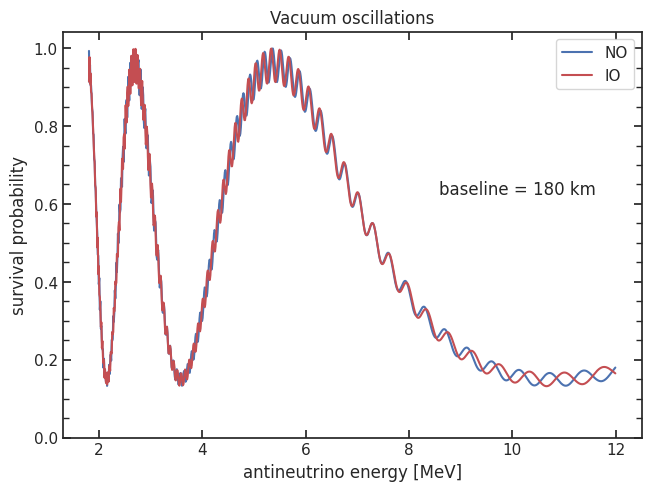

In [4]:
nu_energy = np.arange(1.806, 12, 0.01)

baseline = 180
p_vac_no = util_functions.eval_vacuum_prob(nu_energy, baseline=baseline)
p_vac_io = util_functions.eval_vacuum_prob(nu_energy, ordering="IO", baseline=baseline)

fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.plot(nu_energy, p_vac_no, "b", label="NO")
ax.plot(nu_energy, p_vac_io, "r", label="IO")

ax.legend()
ax.set_xlabel("antineutrino energy [MeV]")
ax.set_ylim(bottom=0)
ax.set_ylabel("survival probability")
text = f"baseline = {baseline} km"
ax.text(0.65, 0.6, text, transform=ax.transAxes)
ax.set_title("Vacuum oscillations")

Text(0.5, 1.0, 'Matter oscillations')

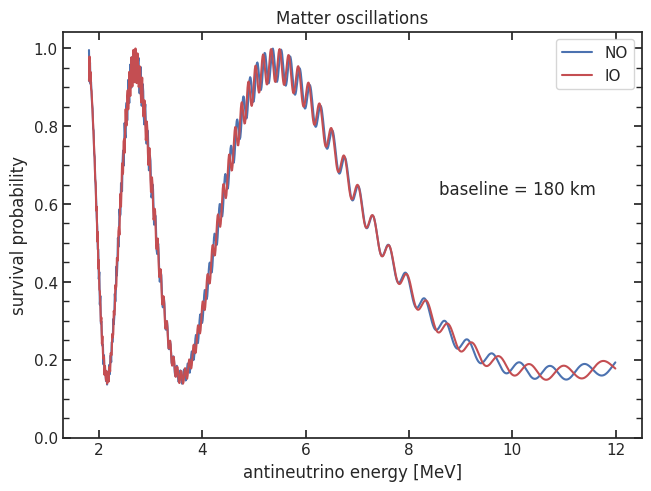

In [5]:
nu_energy = np.arange(1.806, 12, 0.01)

baseline = 180
p_mat_no = util_functions.eval_matter_prob(nu_energy, baseline=baseline)
p_mat_io = util_functions.eval_matter_prob(nu_energy, ordering="IO", baseline=baseline)

fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.plot(nu_energy, p_mat_no, "b", label="NO")
ax.plot(nu_energy, p_mat_io, "r", label="IO")

ax.legend()
ax.set_xlabel("antineutrino energy [MeV]")
ax.set_ylim(bottom=0)
ax.set_ylabel("survival probability")
text = f"baseline = {baseline} km"
ax.text(0.65, 0.6, text, transform=ax.transAxes)
ax.set_title("Matter oscillations")

Text(0.5, 1.0, 'ratio')

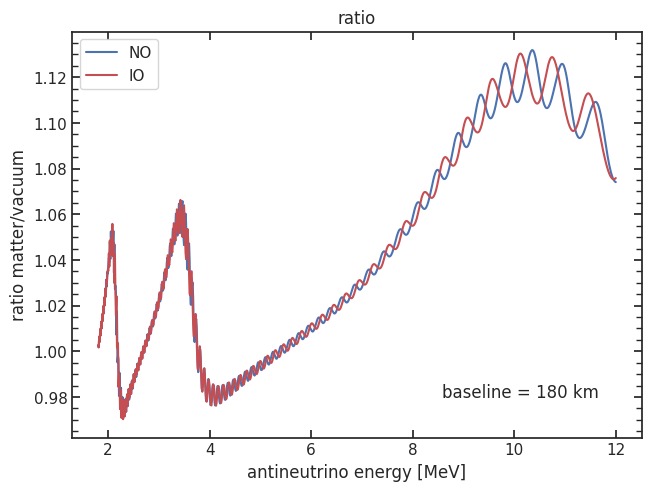

In [6]:
nu_energy = np.arange(1.806, 12, 0.01)

baseline = 180
p_vac_no = util_functions.eval_vacuum_prob(nu_energy, baseline=baseline)
p_mat_no = util_functions.eval_matter_prob(nu_energy, baseline=baseline)

p_vac_io = util_functions.eval_vacuum_prob(nu_energy, baseline=baseline, ordering="IO")
p_mat_io = util_functions.eval_matter_prob(nu_energy, baseline=baseline, ordering="IO")

fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.plot(nu_energy, p_mat_no/p_vac_no, "b", label="NO")
ax.plot(nu_energy, p_mat_io/p_vac_io, "r", label="IO")

ax.legend()
ax.set_xlabel("antineutrino energy [MeV]")
ax.set_ylabel("ratio matter/vacuum")
text = f"baseline = {baseline} km"
ax.text(0.65, 0.1, text, transform=ax.transAxes)
ax.set_title("ratio")

Note: matter has up to 6% effect in reactor antinu energy range (< 8 MeV)

## Plot unoscillated spectrum with proper normalization

(0.0, 18934.60451042963)

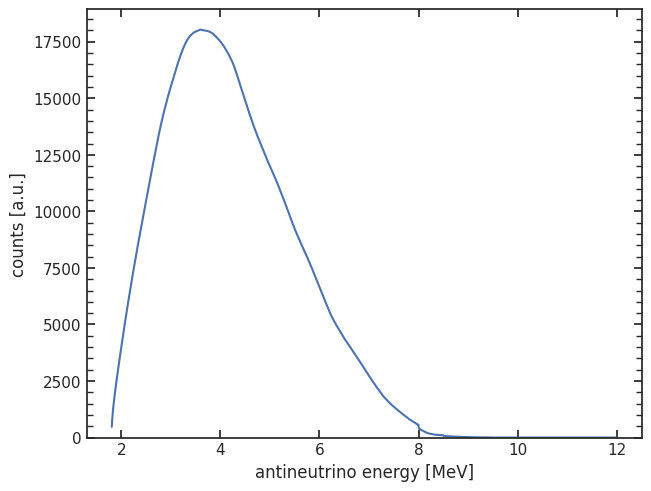

In [7]:
nu_energy = np.arange(1.806, 12, 0.01)
sp = util_functions.eval_unosc_spectrum(nu_energy)

fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.plot(nu_energy, sp)

ax.set_xlabel("antineutrino energy [MeV]")
ax.set_ylabel("counts [a.u.]")
ax.set_ylim(bottom=0)

## Plot oscillated spectra

Text(0.5, 1.0, 'Oscillated spectrum in vacuum')

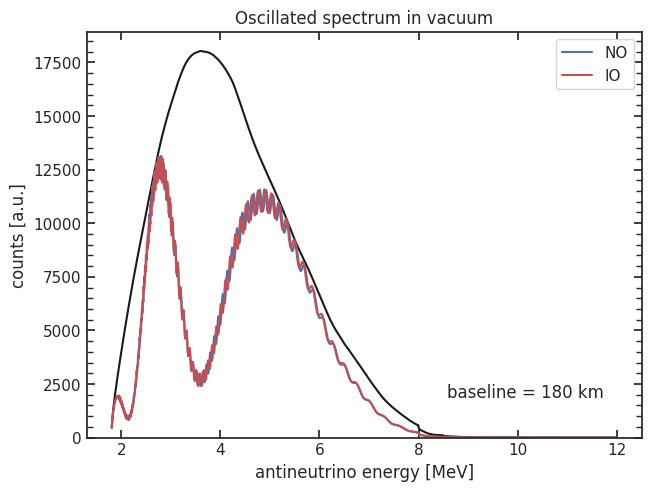

In [8]:
nu_energy = np.arange(1.806, 12, 0.01)
baseline = 180

p_vac_no = util_functions.eval_vacuum_prob(nu_energy, baseline=baseline)
p_vac_io = util_functions.eval_vacuum_prob(nu_energy, ordering="IO", baseline=baseline)

sp = util_functions.eval_unosc_spectrum(nu_energy, baseline=baseline)

sp_osc_vac_no = sp*p_vac_no
sp_osc_vac_io = sp*p_vac_io

fig, ax = plt.subplots(1, 1, constrained_layout=True)

ax.plot(nu_energy, sp, "k")

ax.plot(nu_energy, sp_osc_vac_no, "b", label="NO")
ax.plot(nu_energy, sp_osc_vac_io, "r", label="IO")

ax.legend()
ax.set_xlabel("antineutrino energy [MeV]")
ax.set_ylabel("counts [a.u.]")
ax.set_ylim(bottom=0)
text = f"baseline = {baseline} km"
ax.text(0.65, 0.1, text, transform=ax.transAxes)
ax.set_title("Oscillated spectrum in vacuum")

Text(0.5, 1.0, 'Oscillated spectrum in matter')

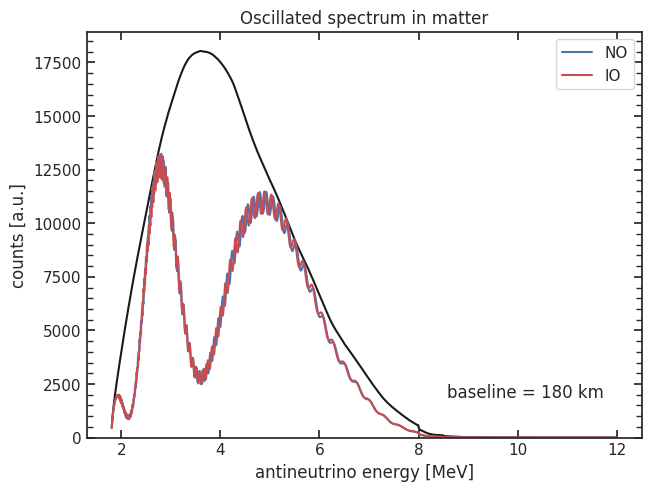

In [9]:
nu_energy = np.arange(1.806, 12, 0.01)
baseline = 180

p_mat_no = util_functions.eval_matter_prob(nu_energy, baseline=baseline)
p_mat_io = util_functions.eval_matter_prob(nu_energy, ordering="IO", baseline=baseline)

sp = util_functions.eval_unosc_spectrum(nu_energy, baseline=baseline)

sp_osc_mat_no = sp*p_mat_no
sp_osc_mat_io = sp*p_mat_io

fig, ax = plt.subplots(1, 1, constrained_layout=True)

ax.plot(nu_energy, sp, "k")

ax.plot(nu_energy, sp_osc_mat_no, "b", label="NO")
ax.plot(nu_energy, sp_osc_mat_io, "r", label="IO")

ax.legend()
ax.set_xlabel("antineutrino energy [MeV]")
ax.set_ylabel("counts [a.u.]")
ax.set_ylim(bottom=0)
text = f"baseline = {baseline} km"
ax.text(0.65, 0.1, text, transform=ax.transAxes)
ax.set_title("Oscillated spectrum in matter")

Text(0.5, 0.98, 'Oscillated spectrum - NO')

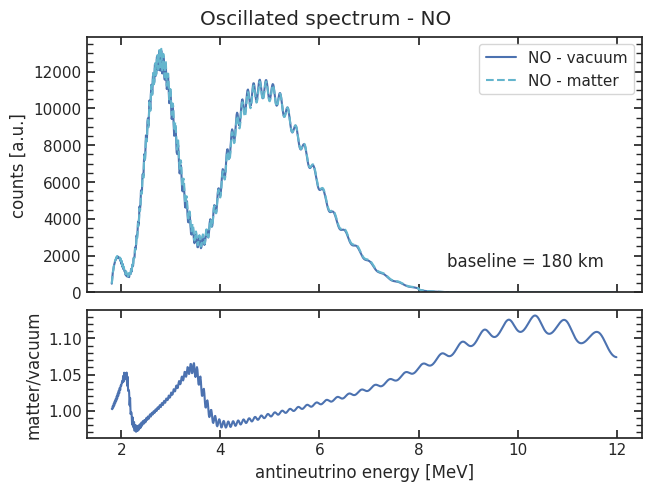

In [10]:
fig, ax = plt.subplots(2, 1, constrained_layout=True, sharex=True, height_ratios=[2,1])
ax[0].plot(nu_energy, sp_osc_vac_no, "b", label="NO - vacuum")
ax[0].plot(nu_energy, sp_osc_mat_no, "c--", label="NO - matter")

ax[1].plot(nu_energy, sp_osc_mat_no/sp_osc_vac_no, "b")

ax[0].legend()
ax[1].set_xlabel("antineutrino energy [MeV]")
ax[0].set_ylabel("counts [a.u.]")
ax[0].set_ylim(bottom=0)
ax[1].set_ylabel("matter/vacuum")
text = f"baseline = {baseline} km"
ax[0].text(0.65, 0.1, text, transform=ax[0].transAxes)
fig.suptitle("Oscillated spectrum - NO")

Text(0.5, 0.98, 'Oscillated spectrum - IO')

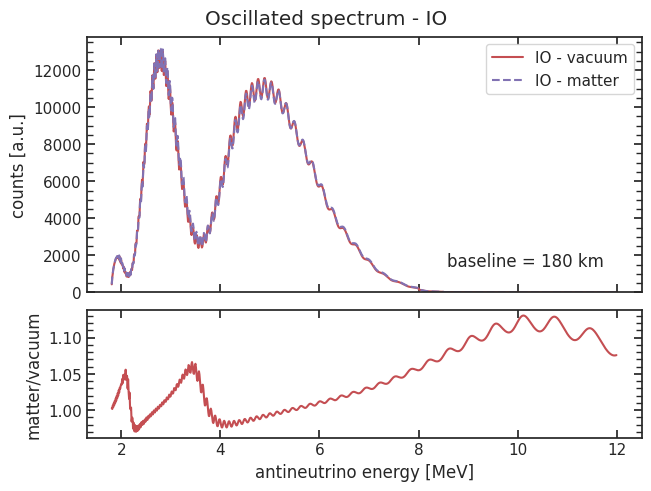

In [11]:
fig, ax = plt.subplots(2, 1, constrained_layout=True, sharex=True, height_ratios=[2,1])
ax[0].plot(nu_energy, sp_osc_vac_io, "r", label="IO - vacuum")
ax[0].plot(nu_energy, sp_osc_mat_io, "m--", label="IO - matter")

ax[1].plot(nu_energy, sp_osc_mat_io/sp_osc_vac_io, "r")

ax[0].legend()
ax[1].set_xlabel("antineutrino energy [MeV]")
ax[0].set_ylabel("counts [a.u.]")
ax[0].set_ylim(bottom=0)
ax[1].set_ylabel("matter/vacuum")
text = f"baseline = {baseline} km"
ax[0].text(0.65, 0.1, text, transform=ax[0].transAxes)
fig.suptitle("Oscillated spectrum - IO")